In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import seaborn as sms

city_path = "Pyber/raw_data/city_data.csv"
ride_path = "Pyber/raw_data/ride_data.csv"

city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)

In [4]:
#merge CSVs
full_df = pd.merge(ride_df, city_df, how='left', on =["city", "city"])
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [9]:
#set city to index
city_data = full_df.set_index('city')

#split dataset by city types
urban_data = city_data.loc[city_data["type"] == "Urban", :]
suburban_data = city_data.loc[city_data["type"] == "Suburban", :]
rural_data = city_data.loc[city_data["type"] == "Rural", :]

#define average fare per city by per type
avg_fare = city_data.groupby(['city']).mean()['fare']
urban_avg_fare = urban_data.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_data.groupby(['city']).mean()['fare']
rural_avg_fare = rural_data.groupby(['city']).mean()['fare']

#define ride count per city per type
ride_count = city_data.groupby(['city']).count()['ride_id']
urban_ride_count = urban_data.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_data.groupby(['city']).count()['ride_id']
rural_ride_count = rural_data.groupby(['city']).count()['ride_id']

#define driver count per city per type
driver_count = city_data.groupby(['city']).mean()['driver_count']
urban_driver_count = urban_data.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_data.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_data.groupby(['city']).mean()['driver_count']

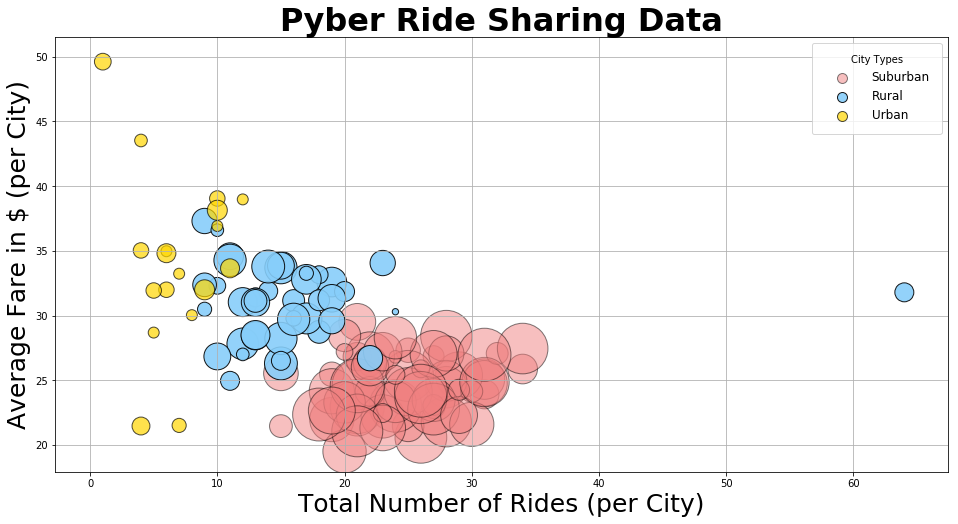

*Note: Circle size correlates with driver count (per City)


In [10]:
#plot scatter graph
plt.figure(figsize=(16, 8))
labels={'Urban', 'Suburban', 'Rural'}
Urban = plt.scatter(urban_ride_count, urban_avg_fare, urban_driver_count*40, alpha=0.5, 
                    facecolors='lightcoral', edgecolors="black")
Suburban = plt.scatter(suburban_ride_count, suburban_avg_fare, suburban_driver_count*40, alpha=0.9, 
                       facecolors='lightskyblue', edgecolors="black")
Rural = plt.scatter(rural_ride_count, rural_avg_fare, rural_driver_count*40, alpha=0.7, 
                    facecolors='gold', edgecolors="black")
plt.title('Pyber Ride Sharing Data', fontsize = 32, fontweight='bold')
plt.xlabel('Total Number of Rides (per City)', fontsize = 25)
plt.ylabel("Average Fare in $ (per City)", fontsize = 25)
lgnd = plt.legend([Urban, Suburban, Rural], labels, ncol = 1, frameon=True, fontsize=12, handlelength=3, 
           loc=1, borderpad=1, handletextpad=1, scatterpoints=1, title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([100.0])
plt.grid(True)

#save figure
plt.savefig("Pyber/Fig1.png")

plt.show()
print("*Note: Circle size correlates with driver count (per City)")

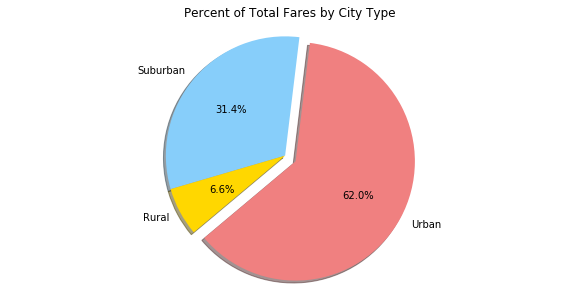

In [7]:
#Pie chart of % of Total Fares by City Type

#define variables
urban_total_fare = urban_data.sum()['fare']
suburban_total_fare = suburban_data.sum()['fare']
rural_total_fare = rural_data.sum()['fare']

#fill in lists
types = ["Urban", "Suburban", "Rural"]
fare_percentage = [urban_total_fare, suburban_total_fare, rural_total_fare]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1, 0, 0)

#plot pie chart
plt.figure(figsize=(10, 5))
plt.title("Percent of Total Fares by City Type")
plt.pie(fare_percentage, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis('equal')
plt.savefig('Pyber/Fig2.png')
plt.show()

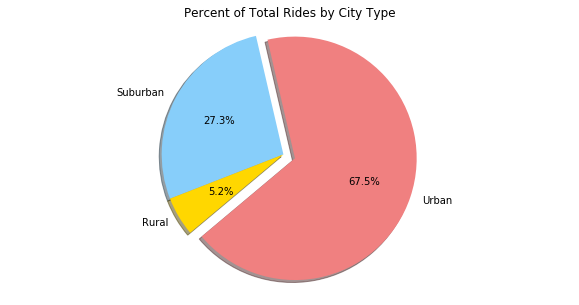

In [211]:
#Pie chart of % of Total Rides by City Type

#define variables
urban_total_rides = urban_data.count()['ride_id']
suburban_total_rides = suburban_data.count()['ride_id']
rural_total_rides = rural_data.count()['ride_id']

#fill in lists
ride_percentage = [urban_total_rides, suburban_total_rides, rural_total_rides]

#plot pie chart
plt.figure(figsize=(10, 5))
plt.title("Percent of Total Rides by City Type")
plt.pie(ride_percentage, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis('equal')
plt.savefig('Pyber/Fig3.png')
plt.show()

14.809741248097412


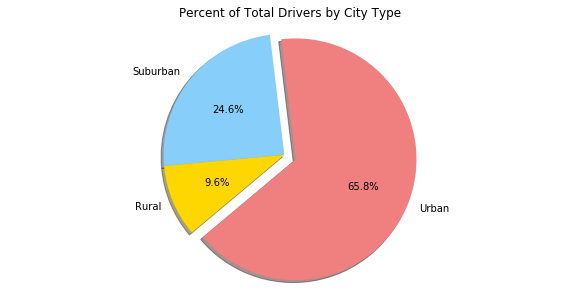

In [212]:
#Pie chart of % of Total Drivers by City Type

#define variables
urban_total_drivers = urban_data.mean()['driver_count']
suburban_total_drivers = suburban_data.mean()['driver_count']
rural_total_drivers = rural_data.mean()['driver_count']
print(suburban_total_drivers)

#fill in lists
ride_percentage = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]

#plot pie chart
plt.figure(figsize=(10, 5))
plt.title("Percent of Total Drivers by City Type")
plt.pie(ride_percentage, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=220)
plt.axis('equal')
plt.savefig('Pyber/Fig4.png')
plt.show()

In [205]:
'''
Trend Observations:
1. Even though Rural cities account for only about 5% of total rides, they have almost 10% of total drivers, 
hinting that there might be more supply than demand. 

2. Rural cities have the greatest inconsistency in fares in comparison with urban and suburban, 
as some rural cities average fares are well below thier urban and suburban counterparts, 
while others are exponentially higher. 

3. Even though a majority of drivers and riders are in Urban cities, the average fares are lower than the other two types,
possibly meaning that the rides are over shorter distances. 

#You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
#See Example Solution for a reference on expected format.

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-205-d5d342ac9b55>, line 14)